# Sprawozdanie Eksploracja Danych
## Laboratorium 3 - 27.11.2024

Zbadanie wpływu parametrów `r` oraz `k` na działanie funkcji znajdującej wartości odbiegające od reszty, korzystając z metody odległości od k-najbliższego sąsiada.

Szymon Moździerz\
Krzysztof Żelazny\
Adrian Sławiński

### Cele sprawozdania:
1. Zbadanie wpływu ilości przedziałów wykorzystanych do przedstawienia danych na histogramie danego rozkładu, na zgodność wykresu z teorią.
2. Zbadanie wpływu parametrów `r` oraz `k` na liczbę oraz rozkład znajdowanych, przez testowaną funckję, wartości odbiegających od normy.

## Wykorzystane biblioteki

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Ziarno

Dla zapewnienia powtarzalności otrzymywanych wyników, wprowadzone zostało stałę ziarno. 

In [ ]:
np.random.seed(1)

## Eksperyment 1

Pierwszy eksperyment polegał na sprawdzeniu jaki wpływ na wygląd histogramu ma liczba binów (przedziałów danych), na które został on podzielony.\
Rozkład wynikowy złożony był z 2 rozkładów normalnych, `N(3, 1)` oraz `N(7, 1)`, po odpowiednio `40%` i `30%` wszystkich próbek oraz rozkładu jednorodnego `J(0, 10)` stanowiącego `30%` wszystkich próbek w ramach zapewnienia szumu.\
Liczba próbek została ustawiona na 1000, a badanie zostało przeprowadzone dla wartości 10, 20, 50, 100 binów.

In [ ]:
sample_size = 1000
x_values = np.concatenate([np.random.normal(3, 1, int(0.4 * sample_size)),
                     np.random.normal(7, 1, int(0.3 * sample_size)),
                     np.random.uniform(0, 10, int(0.3 * sample_size))])
y_values = [0 for _ in range(sample_size)]

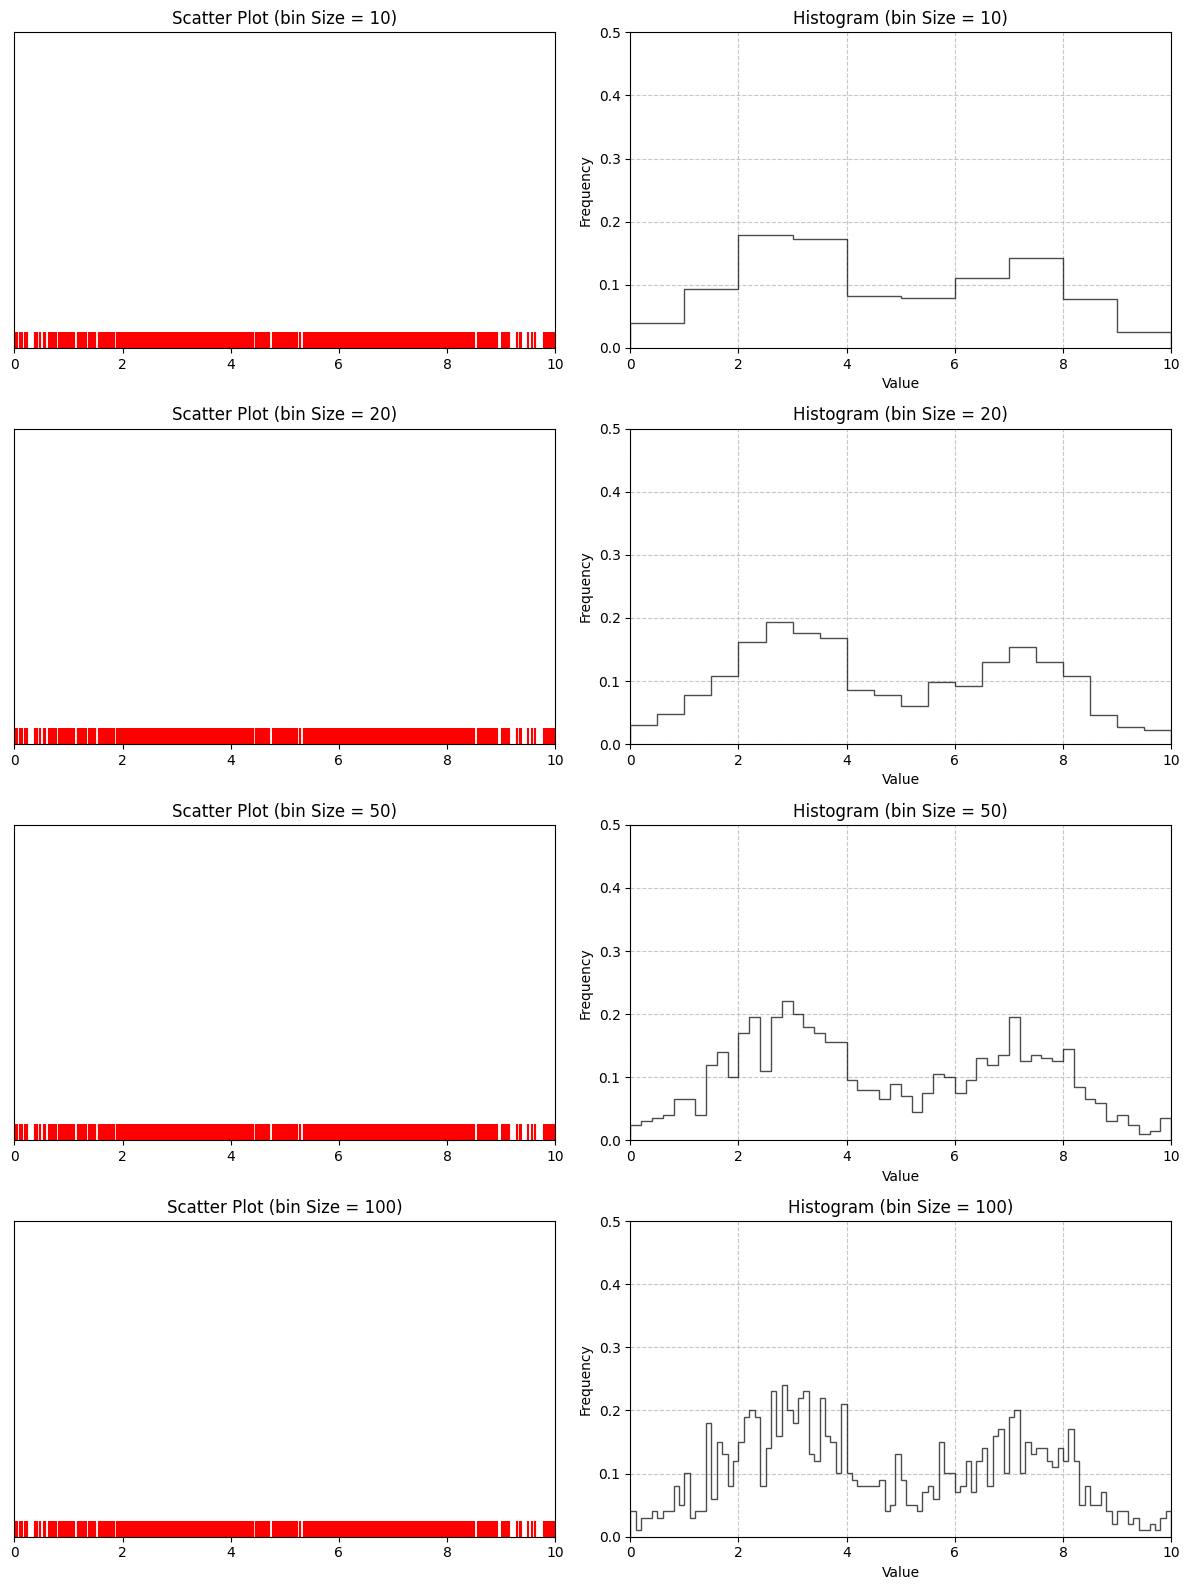

In [ ]:
bin_sizes = [10, 20, 50, 100]
fig, axes = plt.subplots(len(bin_sizes), 2, figsize=(12, len(bin_sizes) * 4))

for idx, bin_size in enumerate(bin_sizes):
    axes[idx, 0].scatter(x_values, y_values, marker='|', s=500, c='r')
    axes[idx, 0].set_title(f'Scatter Plot (bin Size = {bin_size})')
    axes[idx, 0].set_ylim(0, 0.5)
    axes[idx, 0].set_xlim(0, 10)
    axes[idx, 0].set_yticks([])

    bins = np.linspace(0, 10, num=bin_size + 1)

    axes[idx, 1].hist(x_values, bins=bins, edgecolor='black', alpha=0.7, histtype='step', fill=False, density=True)
    axes[idx, 1].set_title(f'Histogram (bin Size = {bin_size})')
    axes[idx, 1].set_xlabel('Value')
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].set_ylim(0, 0.5)
    axes[idx, 1].set_xlim(0, 10)
    axes[idx, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Wnioski

Można zauważyć, że przy niskich wartościach, histogram jest dość ogólny i niektóre szczegóły rozkładu zostają z tego powodu utracone (5, 10 binów, dla tych danych wejściowych). Dla małych binów widoczny jest fragment, który nie powinnien zawierać żadnych wystąpień, spowodowane jest to zbyt dużą szerokością poszczególnych binów.\
Najlepsze wyniki osiągnięte zostały dla wartości 20 oraz 50 binów, bardzo dobrze są wtedy ukazane rzeczywiste odwzorowanie danych z wyraźnie widocznymi słupkami histogramu.\
Przy zbyt dużej liczbie binów, cały histogram staje się nieczytelny, co uniemożliwia wyciągnięcie z niego jakichkolwiek sensownych wniosków.

In [ ]:
def find_outliers(data, k, r):
    n = len(data)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    sorted_indices = np.argsort(dist_matrix, axis=1)
    k_closest_indices = sorted_indices[:, 1:k+1]
    max_distances = np.zeros(n)

    for i in range(n):
        max_distances[i] = max(dist_matrix[i, k_closest_indices[i]])

    sorted_max_distances = np.sort(max_distances)
    threshold_index = int((1 - r) * n)
    threshold = sorted_max_distances[threshold_index]

    outliers = np.where(max_distances > threshold)[0]

    return outliers, max_distances

In [ ]:
k = 5
r = 0.05

y_values = np.array(y_values)
data = np.column_stack((x_values, y_values))

outliers, max_distances = find_outliers(data, k, r)
print(outliers)
print(len(outliers))

[ 42 170 240 305 307 328 401 405 632 703 707 710 730 749 750 755 757 763
 765 768 788 793 795 803 807 815 820 826 845 847 855 861 867 875 894 896
 899 902 912 918 927 929 935 939 955 976 979 983 991]
49


k = 1000, r = 0.01, 9: [710 730 741 861 896 970 976 983 991]


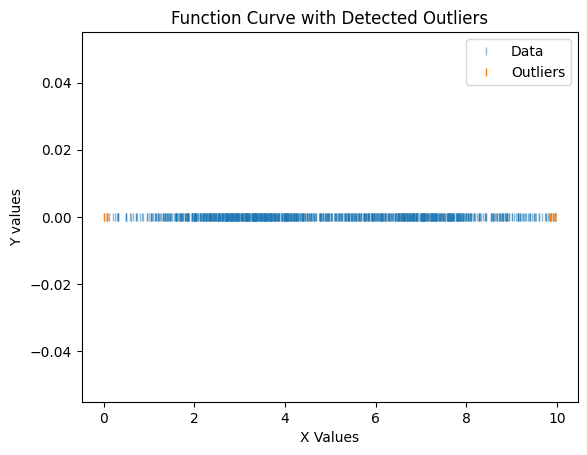

k = 1000, r = 0.05, 49: [ 42 170 218 240 401 419 525 583 632 703 707 710 718 730 741 750 755 757
 763 768 788 793 795 801 803 804 807 820 826 842 845 847 855 861 875 896
 899 902 918 927 929 939 955 970 976 979 983 989 991]


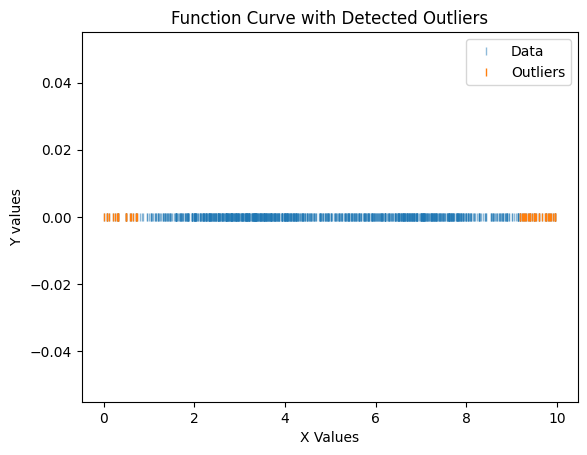

k = 1000, r = 0.1, 99: [  0  37  42  80 170 218 240 277 305 307 327 328 332 401 405 419 420 437
 438 447 470 495 502 503 512 525 538 539 583 632 645 688 692 693 703 706
 707 710 712 714 717 718 730 739 741 750 755 757 761 763 765 768 772 780
 784 788 791 793 795 801 803 804 807 820 826 832 841 842 845 847 855 861
 862 866 873 875 884 888 894 896 899 902 912 914 918 927 929 939 955 957
 958 960 961 970 976 979 983 989 991]


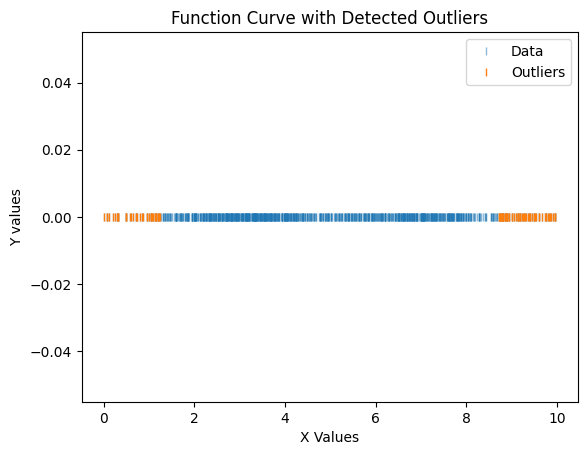

In [ ]:
k_array = [1000]
r_array = [0.01, 0.05, 0.1]

for k in k_array:
    for r in r_array:
        outliers, max_distances = find_outliers(data, k, r)
        print(f'k = {k}, r = {r}, {len(outliers)}: {outliers}')
        plt.plot(x_values, y_values, '|', label='Data', alpha=0.5)
        plt.plot(x_values[outliers], y_values[outliers], '|', label='Outliers')
        plt.title("Function Curve with Detected Outliers")
        plt.xlabel("X Values")
        plt.ylabel("Y values")
        plt.legend()
        plt.show()

In [ ]:
def fnew(x, x0, m=1000):
    return 1./m * 1./math.sqrt(2 * math.pi) * sum(math.exp(-(x - element) ** 2 / 2) for element in x0)

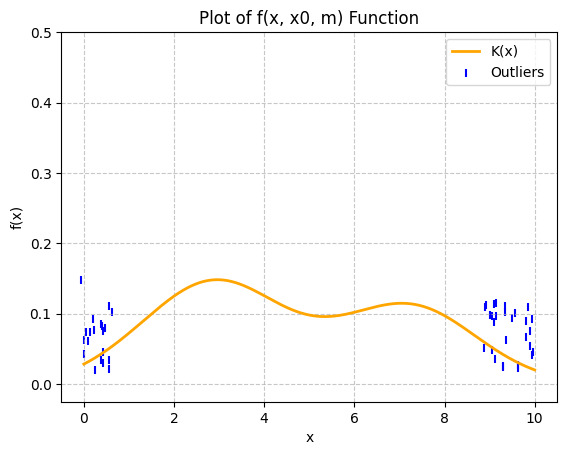

In [ ]:
x = np.linspace(0, 10, sample_size)
y_values2 = np.array([fnew(i, x_values) for i in x])
data2 = np.column_stack((x_values, y_values2))

outliers, max_distances = find_outliers(data2, k, r)

plt.title('Plot of f(x, x0, m) Function')
plt.plot(x, y_values2, label='K(x)', color='orange', linewidth=2)
plt.scatter(x_values[outliers], y_values2[outliers], color='b', marker='|', label='Outliers')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(- (10 * .05), 10.5)
plt.ylim(- (.5 * .05), 0.5)
plt.legend()
plt.show()

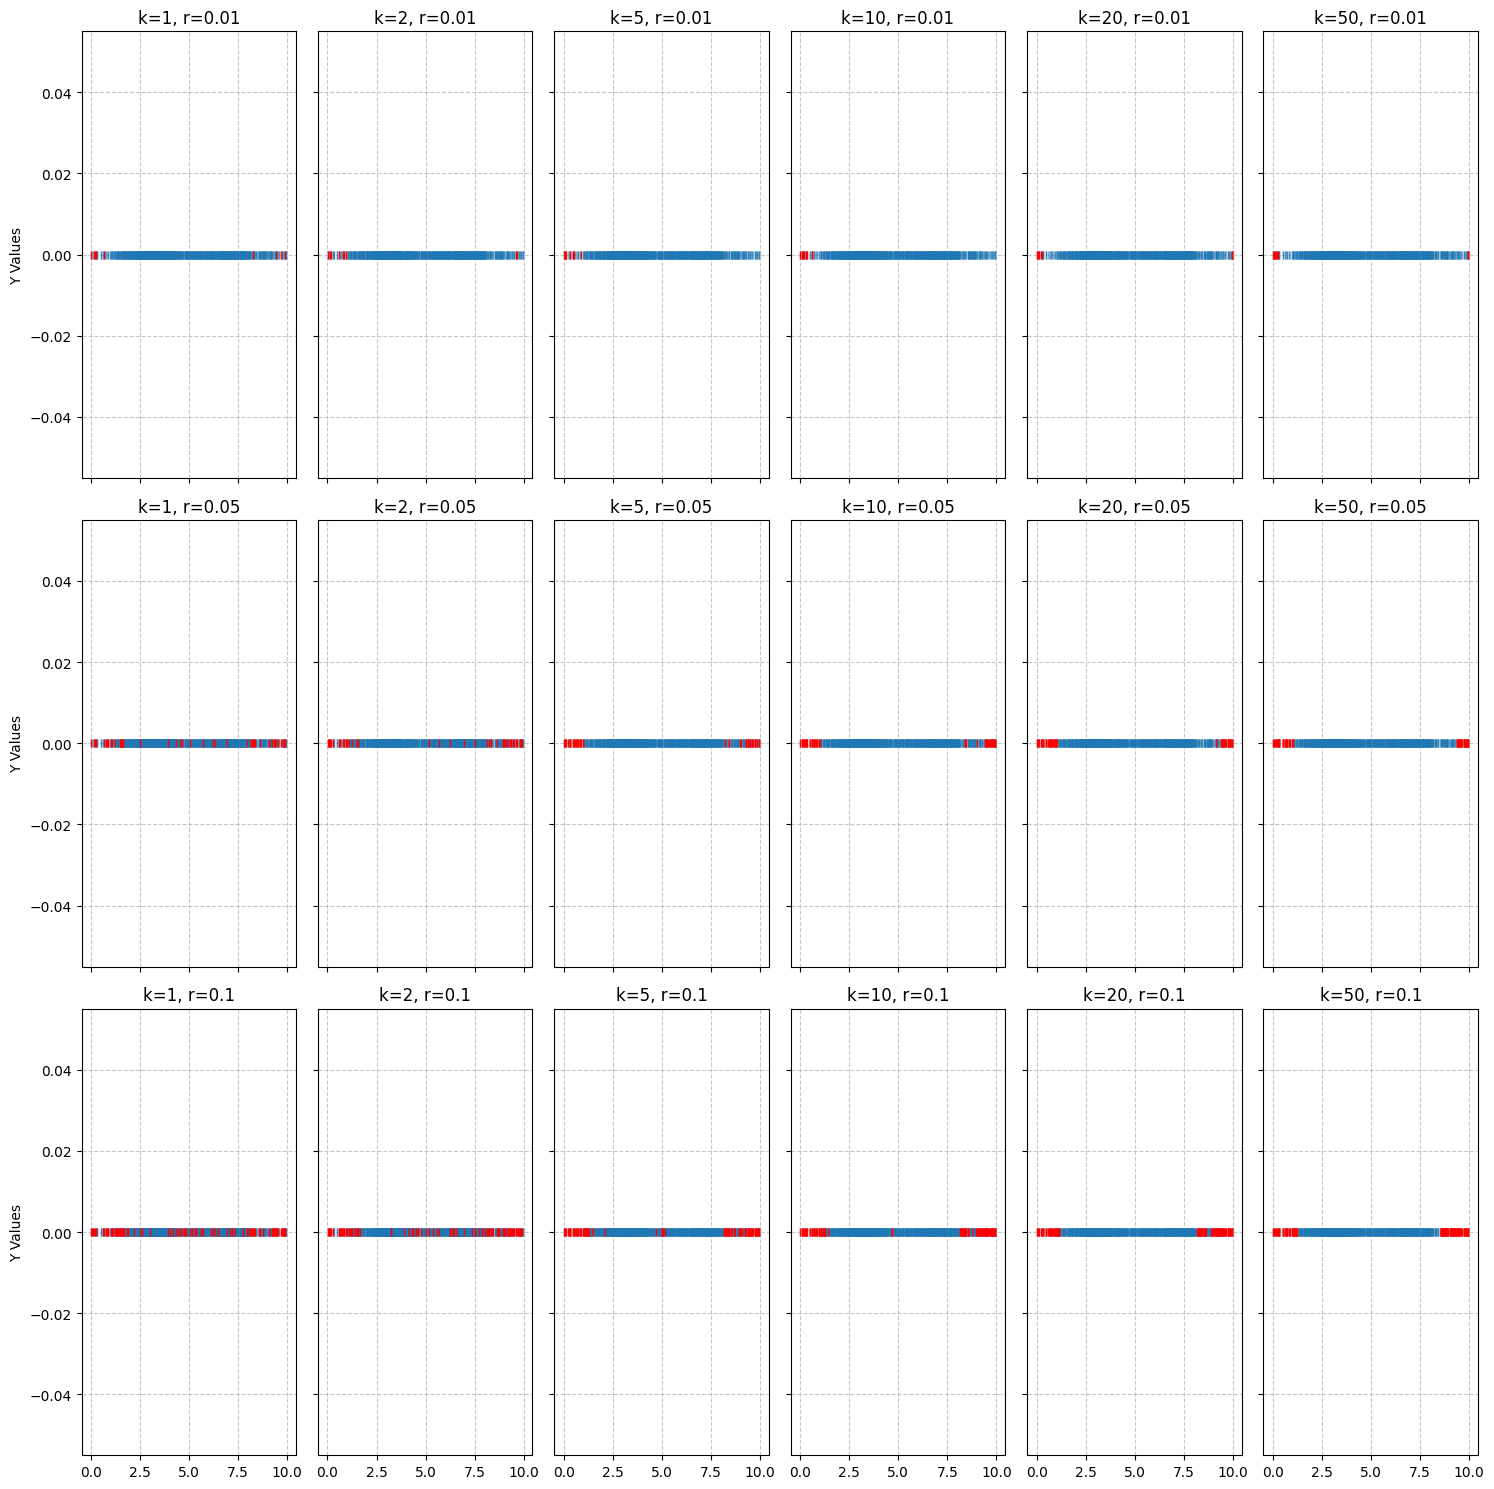

In [ ]:
k_array = [1, 2, 5, 10, 20, 50]
r_array = [0.01, 0.05, 0.1]

# Prepare the multiplot
fig, axes = plt.subplots(len(r_array), len(k_array), figsize=(15, 15), sharex=True, sharey=True)

# Iterate through combinations of k and r
for i, r in enumerate(r_array):
    for j, k in enumerate(k_array):
        # Detect outliers
        outliers, max_distances = find_outliers(data, k, r)

        # Plot on the corresponding subplot
        ax = axes[i, j]
        ax.plot(x_values, y_values, '|', label='Data', alpha=0.5)
        ax.plot(x_values[outliers], y_values[outliers], '|', label='Outliers', color='red')
        ax.set_title(f'k={k}, r={r}')
        ax.grid(True, linestyle='--', alpha=0.7)
        if i == len(k_array) - 1:
            ax.set_xlabel("X Values")
        if j == 0:
            ax.set_ylabel("Y Values")

# Adjust layout
plt.tight_layout()
plt.show()

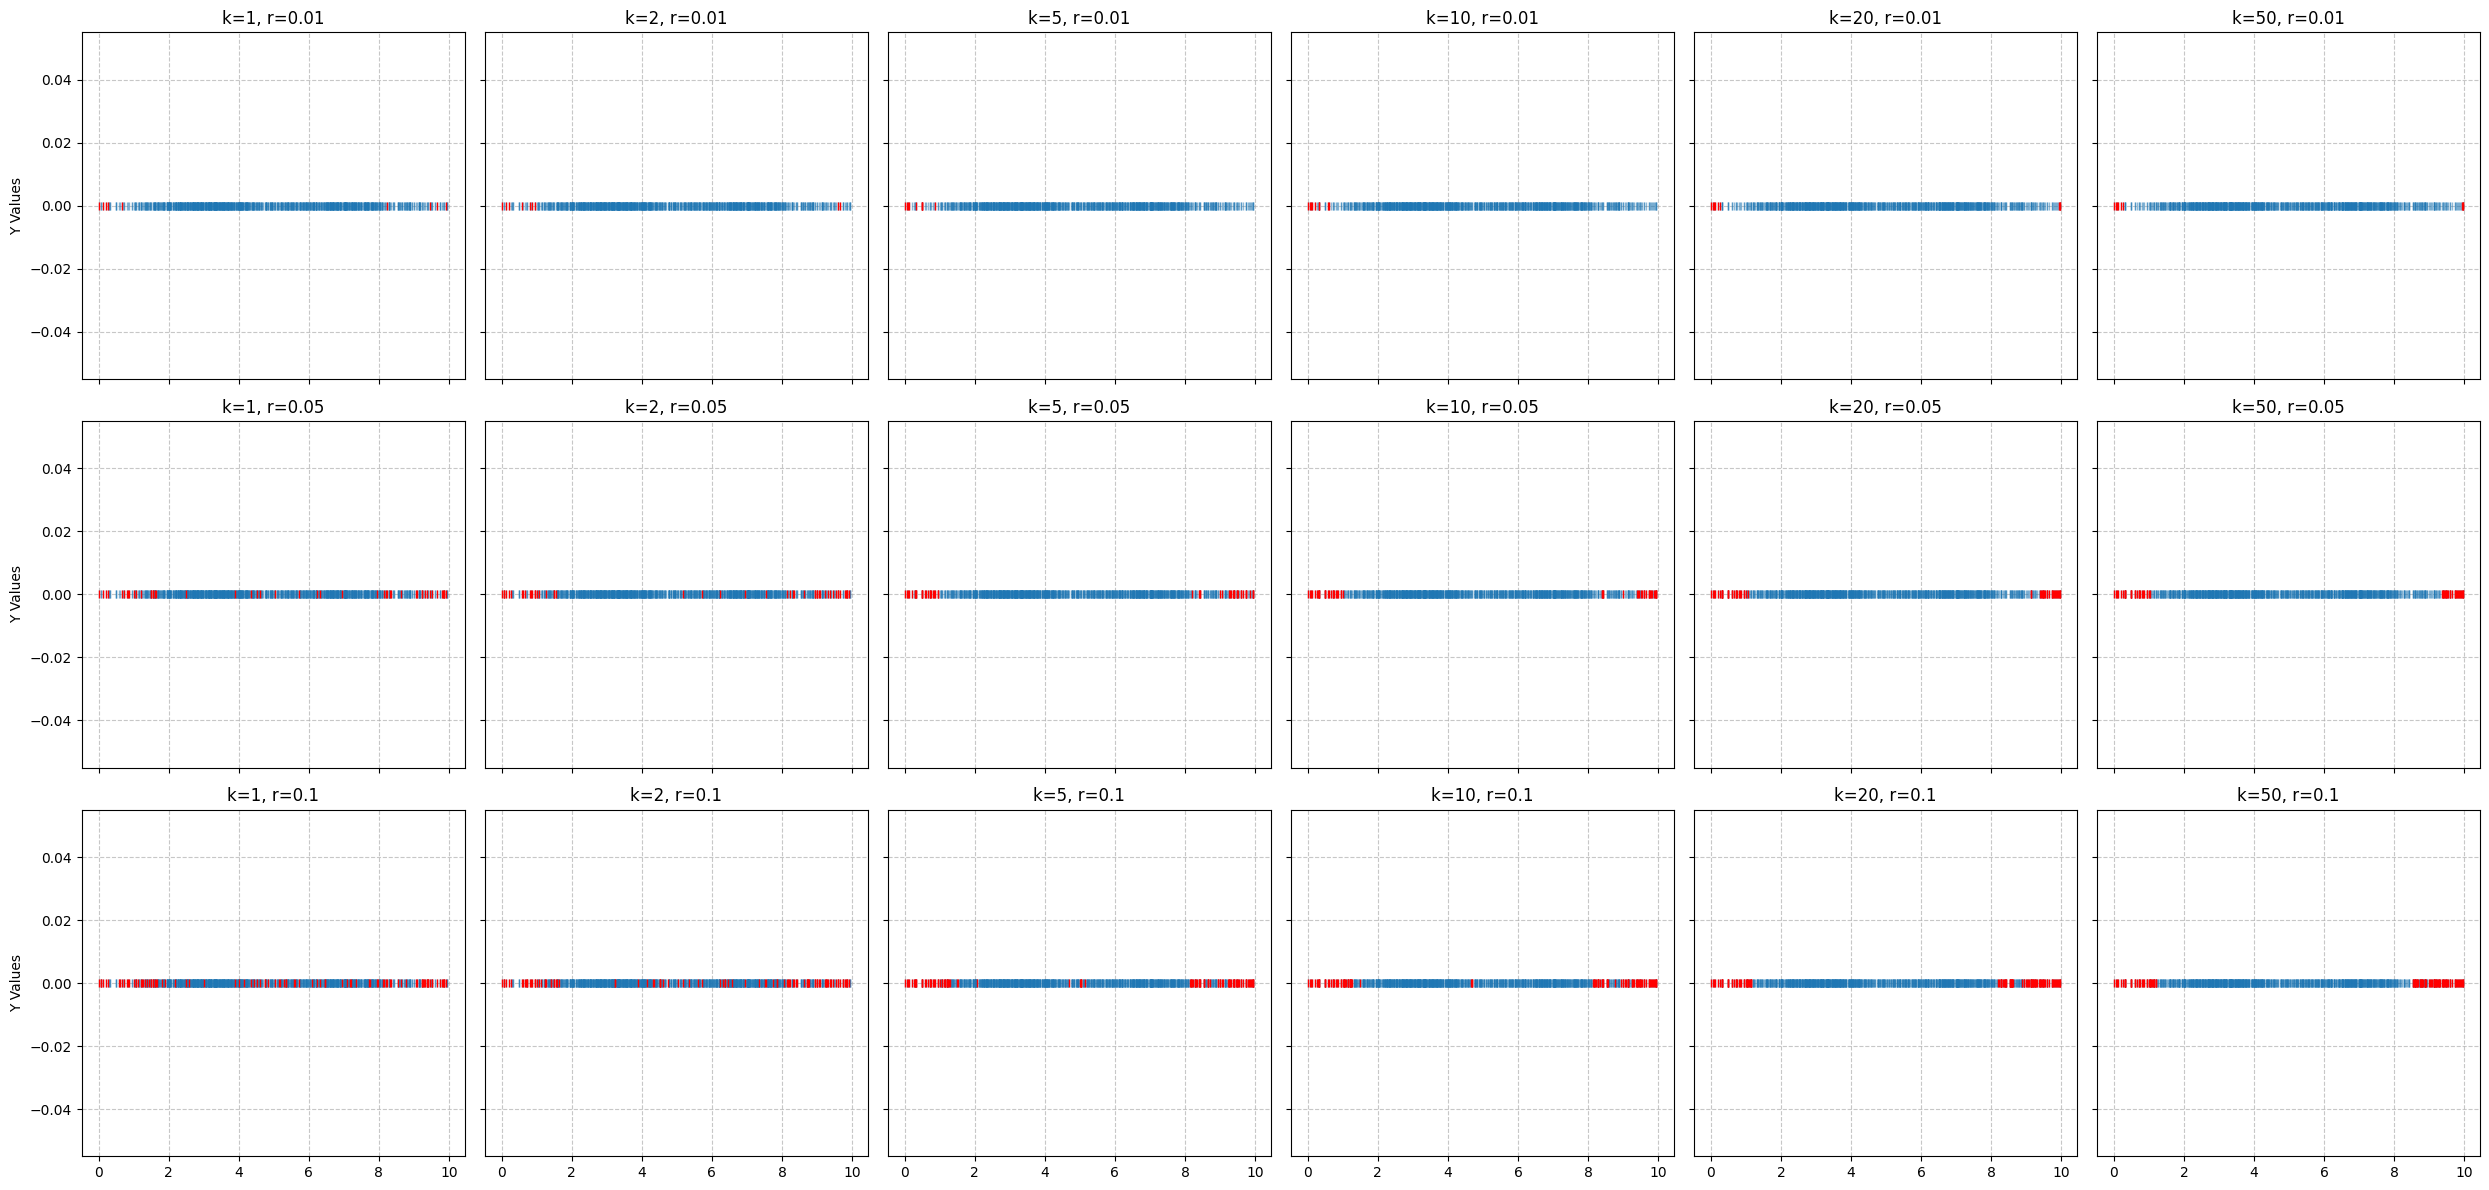

In [ ]:
k_array = [1, 2, 5, 10, 20, 50]
r_array = [0.01, 0.05, 0.1]

fig, axes = plt.subplots(len(r_array), len(k_array), figsize=(25, 12), sharex=True, sharey=True)

for i, r in enumerate(r_array):
    for j, k in enumerate(k_array):
        outliers, max_distances = find_outliers(data, k, r)

        ax = axes[i, j]
        ax.plot(x_values, y_values, '|', label='Data', alpha=0.5)
        ax.plot(x_values[outliers], y_values[outliers], '|', label='Outliers', color='red')
        ax.set_title(f'k={k}, r={r}')
        ax.grid(True, linestyle='--', alpha=0.7)
        if i == len(k_array) - 1:
            ax.set_xlabel("X Values")
        if j == 0:
            ax.set_ylabel("Y Values")

plt.tight_layout()
plt.show()